In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

a = np.random.random((3, 3))
a

array([[0.42295794, 0.02526366, 0.27994935],
       [0.47681718, 0.63559503, 0.15819832],
       [0.58019966, 0.71362744, 0.17385057]])

In [11]:
a[2, [0, 1]]

array([0.26561401, 0.49646595])

In [12]:
x = a[2]
x.mean(where=x<x.max())

0.15329347011029226

In [13]:
a.diagonal()

array([0.39545248, 0.99381617, 0.04097293])

In [14]:
a

array([[0.39545248, 0.08001187, 0.58797757],
       [0.87084464, 0.99381617, 0.06498522],
       [0.26561401, 0.49646595, 0.04097293]])

In [15]:
class myclass(object):
    def __init__(self):
        self._a = np.random.random((3, 3))
    
    @property
    def a(self):
        return self._a

In [16]:
b = myclass()
print(b.a)

b.a[1, 1] = 3
print(b.a)

[[0.56460769 0.11079841 0.53102571]
 [0.75861343 0.95278544 0.56820481]
 [0.20136069 0.85922147 0.91616468]]
[[0.56460769 0.11079841 0.53102571]
 [0.75861343 3.         0.56820481]
 [0.20136069 0.85922147 0.91616468]]


Text(0.5, 0.98, 'aaaaaa')

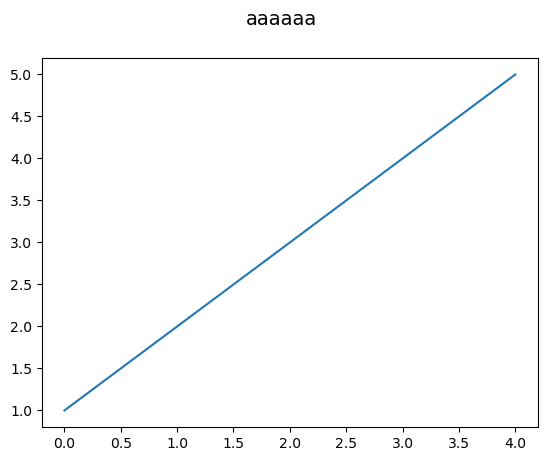

In [28]:
plt.plot(range(5), range(1, 6))
plt.suptitle("aaaaaa", fontsize=14)

In [29]:
for i in range(4):
    if i%2:
        print("a", end="")
    if i//2:
        print("b", end="")
    print()


a
b
ab


In [28]:
import pandas as pd
import numpy as np

a = pd.DataFrame([[i, list(range(i))] for i in range(1, 5)])
a

,0,1
0,1,[0]
1,2,"[0, 1]"
2,3,"[0, 1, 2]"
3,4,"[0, 1, 2, 3]"


In [26]:
a.iloc[2, 1][2] = 5
b = a.iloc[2, 0]
b += b

a

,0,1
0,1,[0]
1,2,"[0, 1]"
2,3,"[0, 1, 5]"
3,4,"[0, 1, 2, 3]"


In [30]:
c = a.iloc[2:3]
c.iloc[0, 1].append(10)
print(c)
d = a.iloc[2:3]
d.iloc[0, 0] = 10
print(d)

a

    0                  1
2  10  [0, 1, 2, 10, 10]
    0                  1
2  10  [0, 1, 2, 10, 10]


,0,1
0,1,[0]
1,2,"[0, 1]"
2,10,"[0, 1, 2, 10, 10]"
3,4,"[0, 1, 2, 3]"


In [35]:
df = pd.DataFrame({'A': [1, 2, 3, 4],
                   'B': [5, 6, 7, 8],
                   'C': [9, 10, 11, 12]})

new_variable = df.iloc[:2, :2]

new_variable.iloc[1, 0] = 99
new_variable['B'] = 100

print(df)
print(new_variable)

    A  B   C
0   1  5   9
1  99  6  10
2   3  7  11
3   4  8  12
    A    B
0   1  100
1  99  100


In [2]:
from scipy import optimize
import numpy as np

def f(x, y):    return np.exp(-(2*x*x + y*y - x*y) / 2)
def g(x, y):    return x*x + 3*(y+1)**2 - 1
def dfdx(x, y): return -1/2 * (4*x - y) * f(x, y)
def dfdy(x, y): return -1/2 * (-x + 2*y) * f(x, y)
def dgdx(x, y): return 2*x
def dgdy(x, y): return 6*(y+1)

def DL(xyl):
    [x, y, l] = xyl
    return np.array([
        dfdx(x, y) - l * dgdx(x, y),
        dfdy(x, y) - l * dgdy(x, y),
        - g(x, y)
    ])

In [13]:
from itertools import product
xs = [-1, 0, 1]
ys = [-1, 0, 1]
ls = [-1, 0, 1]

results = set()
for starting_xyl in product(xs, ys, ls):
    # starting_xyl = (-1, -1, 0)
    res: np.ndarray = optimize.root(DL, starting_xyl).x
    for i, x in enumerate(res):
        res[i] = round(x, 4)
    results.add(tuple(res.tolist()))
    
for result in results:
    (x, y, l) = result
    print(f"x = {x:0<8.5f}\ty = {y:0<8.5f}\tl = {l:0<8.5f}\tf(x, y) = {f(x, y):0<8.5f}")

x = -0.00000	y = -0.39960	l = 0.000000	f(x, y) = 0.923260
x = 0.930900	y = -1.21080	l = -0.15230	f(x, y) = 0.114960
x = -0.95900	y = -1.16370	l = -0.24650	f(x, y) = 0.353880
x = -0.09580	y = -0.42530	l = 0.101100	f(x, y) = 0.923810


False